<a href="https://colab.research.google.com/github/Yessirskii1/Machine-Learning/blob/main/ML_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [143]:
df =  df.drop(columns=['Person ID'], errors='ignore')
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,activity_level
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,low
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,low
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,low
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,low
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,high
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,high
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,high
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,high


# EDA

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
 12  activity_level           374 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 38.1+ KB


In [122]:

# Преобразование категориальных переменных
df['Gender'] = df['Gender'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')

In [123]:
# Создадим бинарную переменную для уровня физической активности
df['activity_level'] = df['Physical Activity Level'].apply(
    lambda x: 'high' if x > df['Physical Activity Level'].median() else 'low'
)
df['activity_level']

,activity_level
0,low
1,low
2,low
3,low
4,low
...,...
369,high
370,high
371,high
372,high


In [60]:



# # превращаем Physical Activity Level в числа (если там строки/NaN)
# df['Physical Activity Level'] = pd.to_numeric(df['Physical Activity Level'], errors='coerce')

# median_val = df['Physical Activity Level'].median()

# df['activity_level'] = np.where(df['Physical Activity Level'] > median_val, 'high', 'low')

# # смотреть результат
# df['activity_level']


,activity_level
0,low
1,low
2,low
3,low
4,low
...,...
369,high
370,high
371,high
372,high


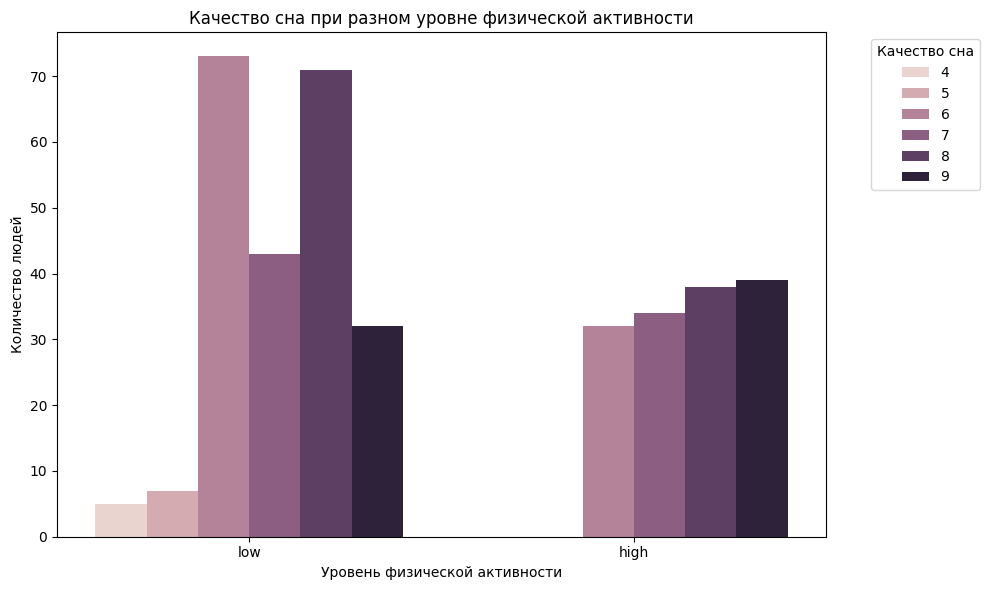

In [124]:

# Визуализируем различия уровня активности и качества сна
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity_level', hue='Quality of Sleep')
plt.title('Качество сна при разном уровне физической активности')
plt.xlabel('Уровень физической активности')
plt.ylabel('Количество людей')
plt.legend(title='Качество сна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


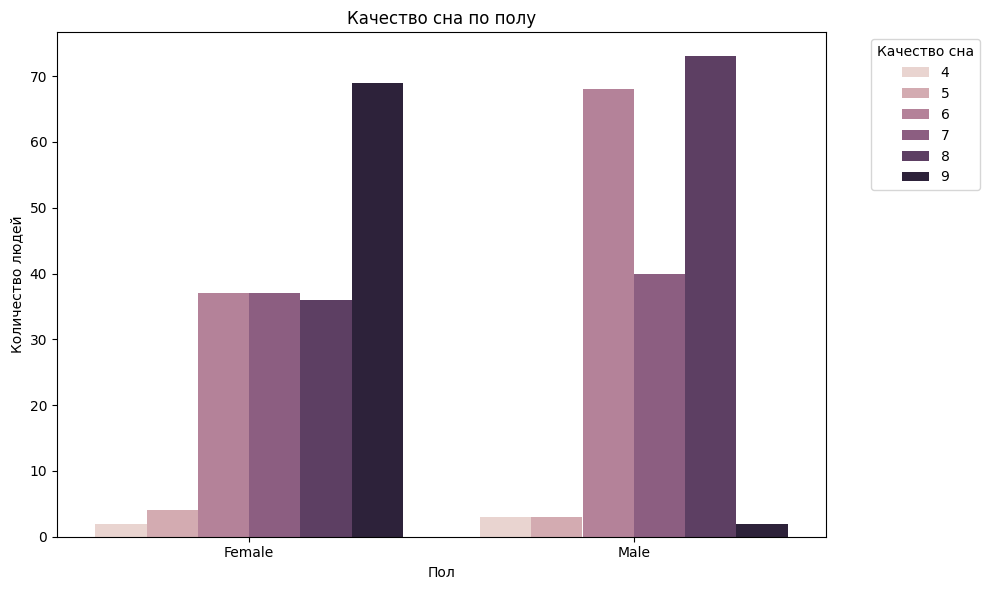

In [125]:
# Визуализируем различия пола и качества сна
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Quality of Sleep')
plt.title('Качество сна по полу')
plt.xlabel('Пол')
plt.ylabel('Количество людей')
plt.legend(title='Качество сна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

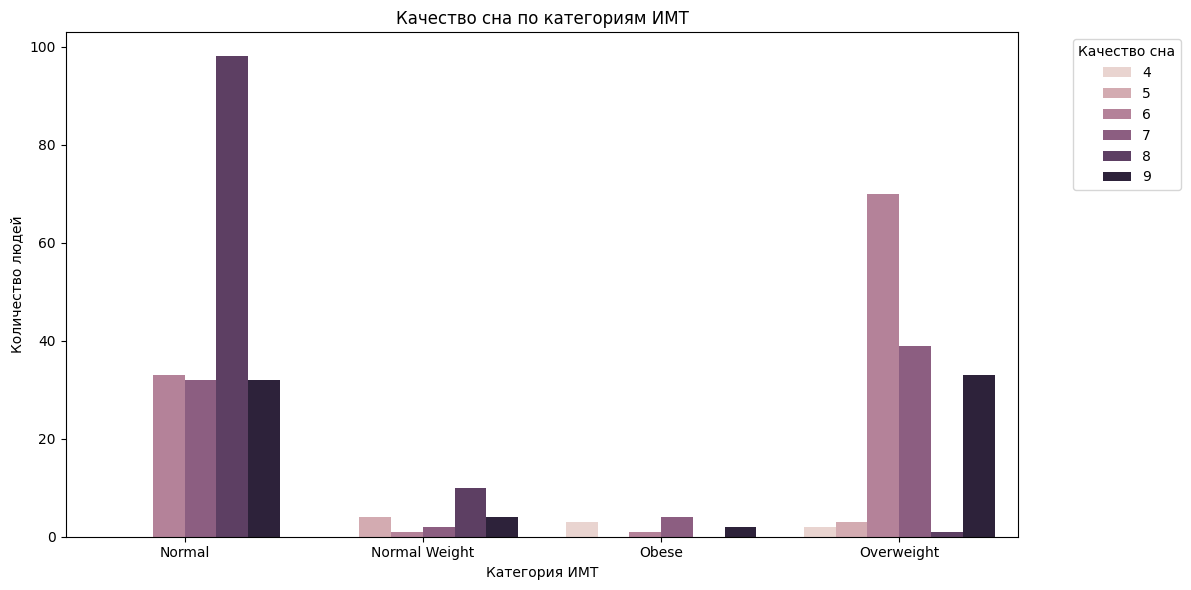

In [126]:
# Визуализируем различия категории BMI и качества сна
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BMI Category', hue='Quality of Sleep')
plt.title('Качество сна по категориям ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Количество людей')
plt.legend(title='Качество сна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

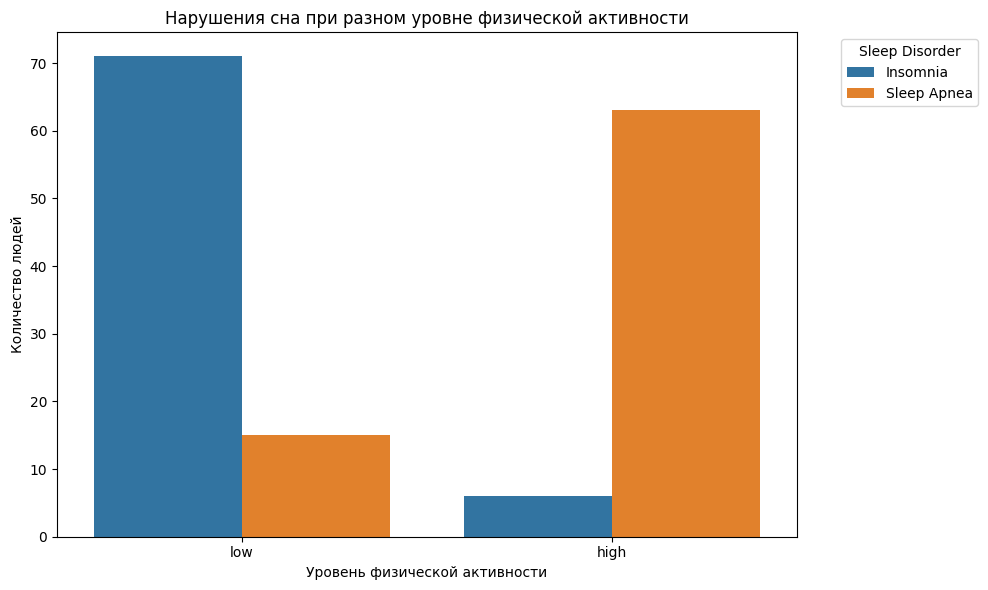

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity_level', hue='Sleep Disorder')
plt.title('Нарушения сна при разном уровне физической активности')
plt.xlabel('Уровень физической активности')
plt.ylabel('Количество людей')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

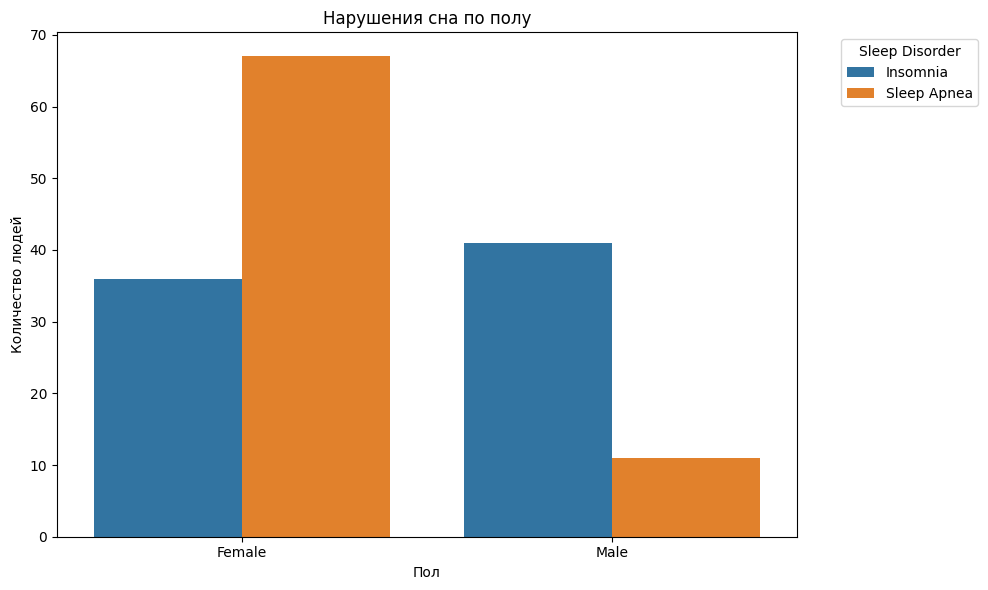

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Sleep Disorder')
plt.title('Нарушения сна по полу')
plt.xlabel('Пол')
plt.ylabel('Количество людей')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

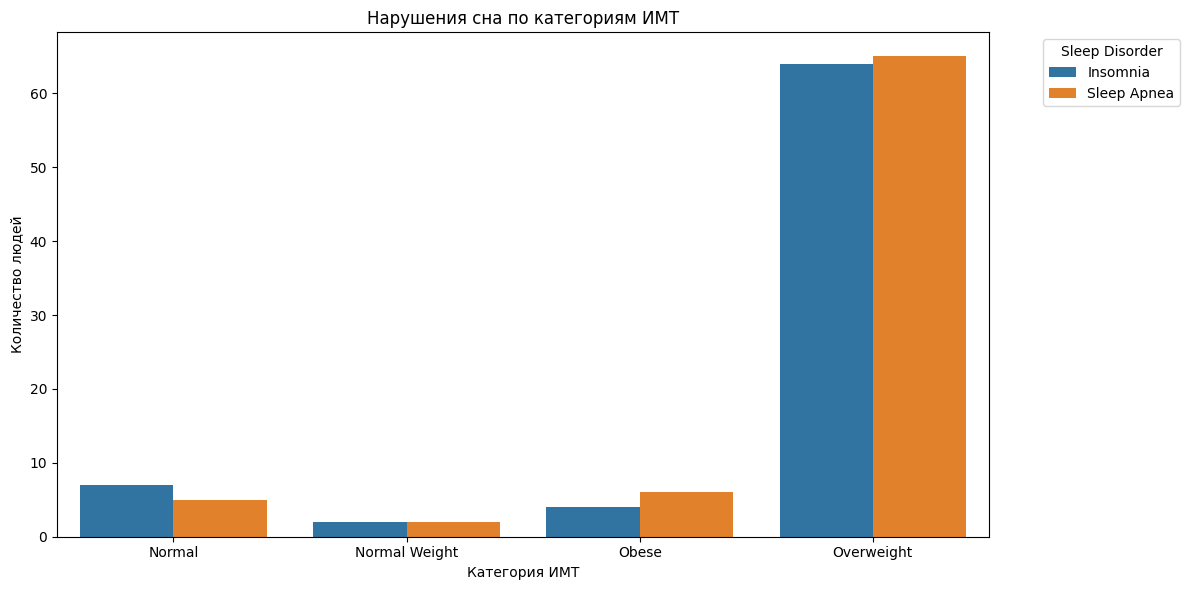

In [129]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder')
plt.title('Нарушения сна по категориям ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Количество людей')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [130]:
cat_features = ['Gender', 'BMI Category', 'Occupation', 'Blood Pressure']

for col in cat_features:
    table = pd.crosstab(df[col], df['Sleep Disorder'])  # таблица нужна для χ², но мы её не печатаем
    chi2, p, dof, expected = chi2_contingency(table)

    print(f"\n{col} vs Sleep Disorder")
    print(f"χ² = {chi2:.2f}")
    print(f"p-value = {p}")
    print(f"Степени свободы = {dof}")

    if p < 0.05:
        print("Влияние доказано")
    else:
      print("Влияния нет")


Gender vs Sleep Disorder
χ² = 24.91
p-value = 6.020958864503523e-07
Степени свободы = 1
Влияние доказано

BMI Category vs Sleep Disorder
χ² = 0.73
p-value = 0.8650218472482435
Степени свободы = 3
Влияния нет

Occupation vs Sleep Disorder
χ² = 110.77
p-value = 1.025739611509183e-19
Степени свободы = 9
Влияние доказано

Blood Pressure vs Sleep Disorder
χ² = 120.62
p-value = 1.5178552597825129e-19
Степени свободы = 13
Влияние доказано


# ХИ2 результат:
Пол (Gender) статистически значимо связан с наличием нарушений сна.


Категория ИМТ (BMI Category) не показывает статистически значимой связи с нарушениями сна.


Профессия (Occupation) имеет статистически значимую связь с нарушениями сна


Артериальное давление (Blood Pressure) также статистически значимо связано с нарушениями сан.

# нормализация числовых признаков

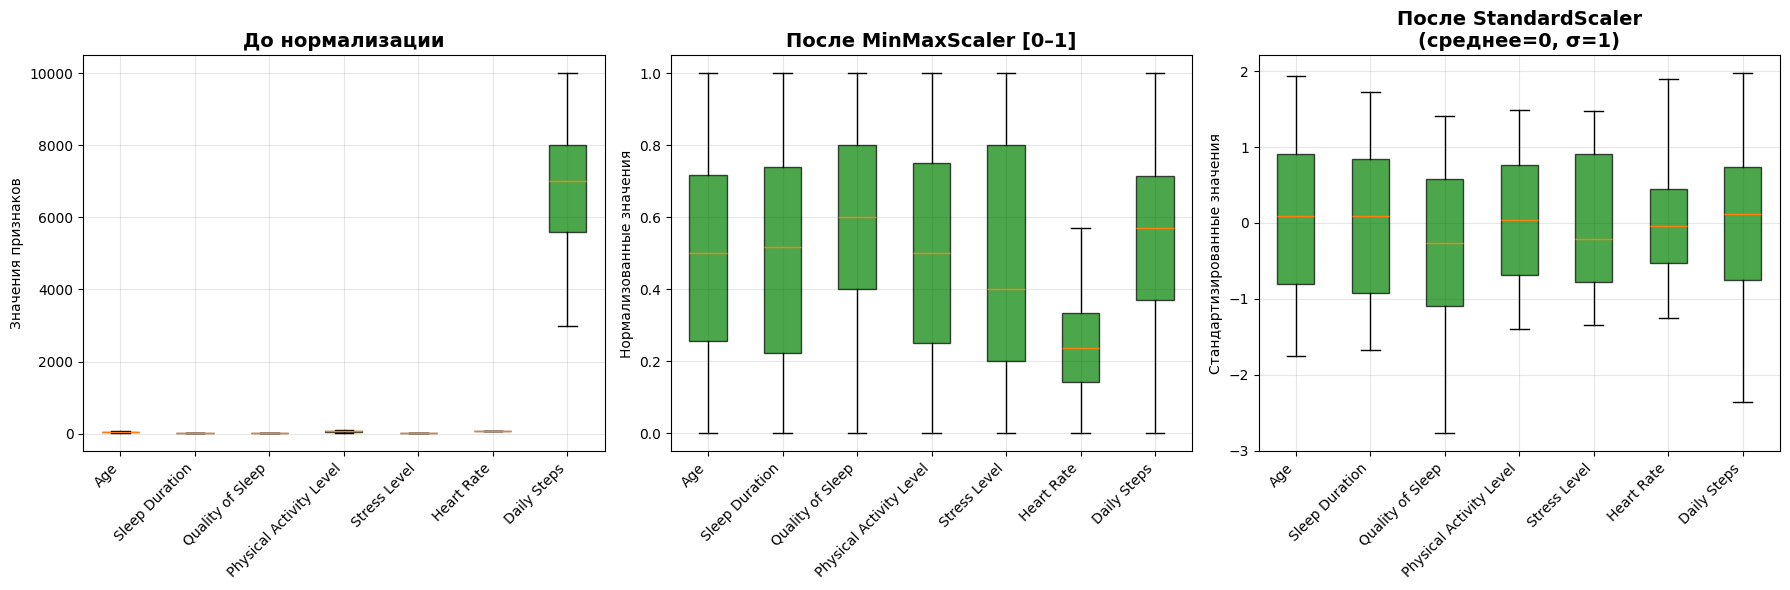

In [131]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Берем все числовые признаки
num_df = df.select_dtypes(include=[int, float]).copy()

# --- Применяем два метода нормализации ---
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(num_df), columns=num_df.columns)
std_scaled = pd.DataFrame(std_scaler.fit_transform(num_df), columns=num_df.columns)

# --- Визуализация ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# До нормализации
box1 = axes[0].boxplot(num_df.values, showfliers=False, patch_artist=True)
axes[0].set_title("До нормализации", fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, len(num_df.columns)+1))
axes[0].set_xticklabels(num_df.columns, rotation=45, ha='right')
axes[0].set_ylabel('Значения признаков')
axes[0].grid(True, alpha=0.3)

# После MinMaxScaler
box2 = axes[1].boxplot(minmax_scaled.values, showfliers=False, patch_artist=True)
axes[1].set_title("После MinMaxScaler [0–1]", fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, len(num_df.columns)+1))
axes[1].set_xticklabels(num_df.columns, rotation=45, ha='right')
axes[1].set_ylabel('Нормализованные значения')
axes[1].grid(True, alpha=0.3)

# После StandardScaler
box3 = axes[2].boxplot(std_scaled.values, showfliers=False, patch_artist=True)
axes[2].set_title("После StandardScaler\n(среднее=0, σ=1)", fontsize=14, fontweight='bold')
axes[2].set_xticks(range(1, len(num_df.columns)+1))
axes[2].set_xticklabels(num_df.columns, rotation=45, ha='right')
axes[2].set_ylabel('Стандартизированные значения')
axes[2].grid(True, alpha=0.3)

# Добавляем цвета для лучшей визуализации
for box in [box1, box2, box3]:
    for patch in box['boxes']:
        patch.set_facecolor('green')
        patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

# Вывод после нормализации
На графике до нормализации видно, что числовые признаки имеют сильно различающиеся масштабы (например, Daily Steps измеряется тысячами и доминирует над остальными). После применения MinMaxScaler все признаки приведены к диапазону [0;1], а после StandardScaler — к виду со средним 0 и σ=1. Это делает признаки сопоставимыми и предотвращает влияние масштаба на обучение моделей, чувствительных к величинам признаков.

In [132]:

y = df['Sleep Disorder']                                     #целевая
X = df.drop(columns=['Sleep Disorder', 'Quality of Sleep'])  # удаляем целевую и качество сна (тк близки по смыслу)
#X
y

,Sleep Disorder
0,NaN
1,NaN
2,NaN
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [133]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()     # числовые
cat_label = ['Gender']                                                        # для LabelEncoder
cat_onehot = ['activity_level', 'BMI Category', 'Occupation']                 # для OneHotEncoder

print("Числовые признаки:", num_cols)
print("LabelEncoder:", cat_label)
print("OneHotEncoder:", cat_onehot)

Числовые признаки: ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
LabelEncoder: ['Gender']
OneHotEncoder: ['activity_level', 'BMI Category', 'Occupation']


In [144]:
# LabelEncoder для признака "Gender"
le = LabelEncoder()
X['Gender_encoded'] = le.fit_transform(X['Gender'])

if 'activity_level' not in X.columns:
    med = X['Physical Activity Level'].median()
    X['activity_level'] = np.where(X['Physical Activity Level'] > med, 'high', 'low')

# OneHotEncoder для activity_level, BMI Category, Occupation
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' убирает лишнюю колонку
categorical_encoded = pd.DataFrame(
    ohe.fit_transform(X[cat_onehot]),
    columns=ohe.get_feature_names_out(cat_onehot)
)


X_processed = pd.concat([X[num_cols], X['Gender_encoded'], categorical_encoded], axis=1)

# --- 3. Нормализация числовых признаков ---
scaler = MinMaxScaler()
X_processed[num_cols] = scaler.fit_transform(X_processed[num_cols])

# Удалим строки с NaN значениями
nan_mask = X_processed.isnull().any(axis=1) | y.isnull()
# Удаляем строки с NaN
X_processed_clean = X_processed[~nan_mask]
y_clean = y[~nan_mask]

print("Форма данных после преобразований:", X_processed.shape)
print("\nПервые 5 строк после преобразований:")
X_processed
# y_clean

Форма данных после преобразований: (374, 21)

Первые 5 строк после преобразований:


,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_encoded,activity_level_low,BMI Category_Normal Weight,BMI Category_Obese,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,0.00000,0.111111,0.20,0.6,0.571429,0.171429,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.03125,0.148148,0.50,1.0,0.476190,1.000000,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.03125,0.148148,0.50,1.0,0.476190,1.000000,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03125,0.037037,0.00,1.0,0.952381,0.000000,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.03125,0.037037,0.00,1.0,0.952381,0.000000,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
370,1.00000,0.814815,0.75,0.0,0.142857,0.571429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
371,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# Разделение на тренировочную и тестовую выборки (после очистки от NaN)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_clean, y_clean, test_size=0.3, random_state=42, stratify=y_clean
)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер тренировочной выборки: (108, 21)
Размер тестовой выборки: (47, 21)


# ОБУЧЕНИЕ + МЕТРИКИ:

In [136]:

# Объявим модель логистической регрессии
model = LogisticRegression(penalty=None,  # регуляризация (добавление штрафа за большие коэффициенты)
    random_state=42,
    max_iter=1000
)

# Обучаем модель
model.fit(X_train, y_train)

print("Модель логистической регрессии обучена!")

y_pred = model.predict(X_test)
y_pred


#Это просто массив (список) из предсказанных меток классов для каждой строки тестового набора:

Модель логистической регрессии обучена!


array(['Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Insomnia',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'Insomnia',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'Sleep Apnea', 'Insomnia',
       'Insomnia', 'Insomnia', 'Insomnia', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Insomnia', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'Insomnia'], dtype=object)

In [137]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

# модель отдаёт насколько она уверена в каждом классе.
#строки = объекты из X_test
#столбцы = классы
#То есть одна строка типа: [0.0, 1.0] - вероятность класса №1 = 0.0,  вероятность класса №2 = 1.0 то ест модель почти на 100% уверена во втором классе.


array([[0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 3.57819480e-170],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 6.47182504e-167],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 6.71962182e-137],
       [1.00000000e+000, 0.00000000e+000],
       [2.53874137e-006, 9.99997461e-001],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 3.06242688e-298],
       [1.00000000e+000, 5.52580951e-016],
       [1.00000000e+000, 3.15161975e-155],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 7.19829832e-162],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 7.19829832e-162],
       [0.0

In [138]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

In [139]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [140]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (если переданы вероятности)
    roc_auc = None
    if y_proba is not None:
        # Если многоклассовая классификация — One-vs-Rest
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }


In [141]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
Accuracy:  0.9815
Precision: 0.9821
Recall:    0.9815
F1-score:  0.9815
ROC-AUC:   0.9991

Confusion Matrix:
[[54  0]
 [ 2 52]]


In [142]:
metrics = evaluate_classification(y_test, y_pred, y_proba)

=== Метрики классификации ===
Accuracy:  0.8936
Precision: 0.8942
Recall:    0.8936
F1-score:  0.8935
ROC-AUC:   0.9035

Confusion Matrix:
[[20  3]
 [ 2 22]]


# МЕТРИКИ ВЫВОД:
**На обучающей выборке 70% получены хорошие значения метрик:**

Accuracy = 0.9815

F1 = 0.9815

ROC-AUC = 0.9991.

Матрица ошибок показывает всего 2 ошибки (54 верных предсказания одного класса, 52 — другого).

На тестовой выборке 30% модель сохраняет хорошее качество:
Accuracy ≈ 0.8936

F1 ≈ 0.8935

ROC-AUC ≈ 0.9035.

По матрице ошибок видно, что допущено 5 ошибок из 47 наблюдений (3 случая одного типа и 2 — другого).

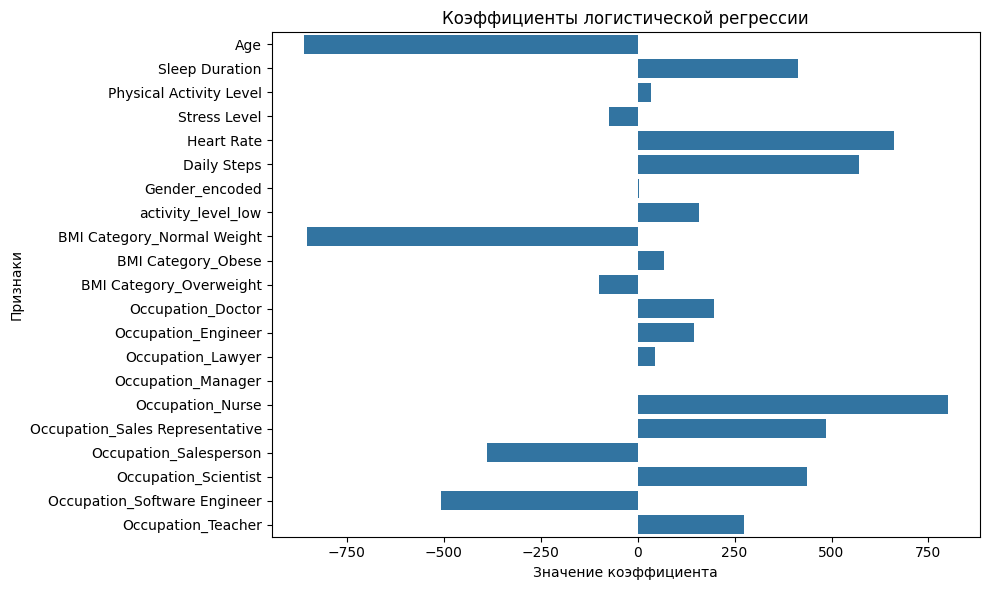

In [145]:
feature_names = X_processed_clean.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_[0], y=feature_names, orient="h")
plt.xlabel("Значение коэффициента")
plt.ylabel("Признаки")
plt.title("Коэффициенты логистической регрессии")
plt.tight_layout()
plt.show()

# микровывод
**Сильнее всего вклад дают:**

Age

BMI Category_Normal Weight

Heart Rate

Daily Steps

Из профессий: Occupation_Nurse

------------------
**Меньше всего вклад дают**

Gender_encoded

Physical Activity Level

activity_level_low

Stress Level

BMI Category_Obese